In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
#a = trending유튜브, b=코로나
a = pd.read_csv('csv_file/kr20_ver2.csv')
b = pd.read_csv('csv_file/corona_cases_ver2.csv')

#애초에 index를 정해주고 싶으면 옵션에 index_col='trending_date' 와 같이 설정해도 됨

In [35]:
#정렬, axis=0 인경우 오름차순, axis=1이면 내림차순
a.sort_values(by='views').head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
47002,2021-04-23,Earth Day 2021 Doodle,GoogleDoodles,1,2021-04-21T11:00:14Z,[None],0,0,0,0,21-04
25735,2021-01-06,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,24,2020-12-31T14:00:10Z,YouTube Originals|YouTube|Hello 2021 Korea|ful...,0,2143,82,657,21-01
25081,2021-01-03,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,24,2020-12-31T14:00:10Z,YouTube Originals|YouTube|Hello 2021 Korea|ful...,0,2117,77,643,21-01


In [36]:
a.sort_values(by='views').tail(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
54729,2021-06-03,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,2021-05-21T03:46:13Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,289350312,16369715,175204,6889393,21-06
54938,2021-06-03,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,2021-05-21T03:46:13Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,292502967,16413537,178381,6913277,21-06
55138,2021-06-04,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,10,2021-05-21T03:46:13Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,296314174,16464253,181350,6939302,21-06


In [37]:
a.sort_values(by='views').iloc[44000]

trending_date              2021-03-27
title                      [병맛노래] 원펀맨
channel_title                  빨간내복야코
category_id                        24
publish_time     2021-03-20T03:00:20Z
tags                 #병맛노래|#병맛송|#웃긴노래
views                          607632
likes                            9681
dislikes                          532
comment_count                    3675
trending_ym                     21-03
Name: 41690, dtype: object

In [6]:
# 데이터 선택 / loc 안에는 index선택 가능
b.loc[655]

date              2021-11-06
local_outbreak         2,218
imported_cases            29
death                     20
total_death             2956
new_cases               2247
total_cases           377709
variation                -96
year_month             21-11
Name: 655, dtype: object

In [7]:
#날짜를 인덱스로 하고 싶으면
b.index = pd.to_datetime(b['date'])
b.loc['2021-11-06']

date              2021-11-06
local_outbreak         2,218
imported_cases            29
death                     20
total_death             2956
new_cases               2247
total_cases           377709
variation                -96
year_month             21-11
Name: 2021-11-06 00:00:00, dtype: object

In [8]:
#loc에 행,열값 넣어서  value값을 읽고 싶을 때
b.loc['2021-11-06', 'new_cases']

2247

In [11]:
#복수 행, 열값 value 읽고 싶을 때
b.loc[['2020-11-06', '2021-11-06'], 'total_cases']

date
2020-11-06     27193
2021-11-06    377709
Name: total_cases, dtype: int64

In [16]:
#복수 행, 복수열값 value 읽고 싶을 때
b.loc[['2020-11-06', '2021-11-06'], ['total_death', 'total_cases']]

,total_death,total_cases
date,,
2020-11-06,476,27193
2021-11-06,2956,377709


In [17]:
#슬라이싱도 가능(뒤에 적어준값까지 포함 인덱싱임!)
b.loc['2020-11-06':'2021-11-06', 'total_death':'total_cases']

,total_death,new_cases,total_cases
date,,,
2020-11-06,476,145,27193
2020-11-07,477,89,27282
2020-11-08,478,143,27425
2020-11-09,480,126,27551
2020-11-10,485,100,27651
...,...,...,...
2021-11-02,2874,1589,367970
2021-11-03,2892,2667,370637
2021-11-04,2916,2482,373119


In [19]:
#인덱스를 이용한 데이터 선택 ,iloc
a.iloc[12352]

trending_date                                           2020-10-27
title            [오픈마이크] 시각장애인 안내견의 하루…어딜 개가! 밥 먹으려다 7번 거절 / JT...
channel_title                                            JTBC News
category_id                                                     25
publish_time                                  2020-10-24T11:34:22Z
tags             JTBC|JTBC NEWS|뉴스|뉴스룸|손석희|newsroom|sohnsukhee|...
views                                                       578439
likes                                                        13742
dislikes                                                       152
comment_count                                                 6328
trending_ym                                                  20-10
Name: 12352, dtype: object

In [21]:
#모든 문법 loc와 동일, 많이 사용할만한거 하나 뽑자면
b.iloc[:,[1,6]]

,local_outbreak,total_cases
date,,
2020-01-21,0,0
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,1
2020-01-25,0,1
...,...,...
2021-11-04,"2,457",373119
2021-11-05,"2,323",375462
2021-11-06,"2,218",377709


In [25]:
#데이터 선택(조건), 괄호해야지 모호한 표현 에러없이 진행, 우선 일일 확진자 변화량이 400명 이상인 경우 받음
(b['variation'] <= -400) | (b['variation'] >= 400)

date
2020-01-21    False
2020-01-22    False
2020-01-23    False
2020-01-24    False
2020-01-25    False
              ...  
2021-11-04    False
2021-11-05    False
2021-11-06    False
2021-11-07    False
2021-11-08     True
Name: variation, Length: 658, dtype: bool

In [26]:
#필터로 사용, 이값들이 거리두기 데이터랑 연관지어서 정말 효과가 있는지 여부, 다음날 유튜브 영상 변화 등 데이터 확보해보기
#변수지정말고 바로 집어넣어도 무방
my_filter1 = (b['variation'] <= -400) | (b['variation'] >= 400)
b[my_filter1]

,date,local_outbreak,imported_cases,death,total_death,new_cases,total_cases,variation,year_month
date,,,,,,,,,
2020-02-29,2020-02-29,909,0,3,16,909,2930,482,20-02
2021-07-07,2021-07-07,"1,166",45,1,2033,1211,162750,465,21-07
2021-07-14,2021-07-14,"1,566",47,2,2048,1613,171906,463,21-07
2021-07-21,2021-07-21,"1,725",56,1,2060,1781,182252,503,21-07
2021-07-28,2021-07-28,"1,822",73,4,2083,1895,193412,532,21-07
2021-08-04,2021-08-04,"1,664",61,2,2106,1725,203918,525,21-08
2021-08-11,2021-08-11,"2,144",77,1,2135,2221,216196,684,21-08
2021-08-18,2021-08-18,"1,766",37,5,2178,1803,228645,431,21-08
2021-08-25,2021-08-25,"2,113",41,9,2237,2154,241427,647,21-08


In [27]:
#물결 표시 사용하면, 필터를 역으로 적용
b[~my_filter1]

,date,local_outbreak,imported_cases,death,total_death,new_cases,total_cases,variation,year_month
date,,,,,,,,,
2020-01-21,2020-01-21,0,0,0,0,0,0,0,20-01
2020-01-22,2020-01-22,0,0,0,0,0,0,0,20-01
2020-01-23,2020-01-23,0,0,0,0,0,0,0,20-01
2020-01-24,2020-01-24,0,1,0,0,1,1,1,20-01
2020-01-25,2020-01-25,0,0,0,0,0,1,-1,20-01
...,...,...,...,...,...,...,...,...,...
2021-11-02,2021-11-02,"1,578",11,16,2874,1589,367970,-96,21-11
2021-11-04,2021-11-04,"2,457",25,24,2916,2482,373119,-185,21-11
2021-11-05,2021-11-05,"2,323",20,20,2936,2343,375462,-139,21-11


In [61]:
#loc 메서드와 조건 함께 사용하기 와.. 좋아요98%이상이 절반가까이됨. trending 기준이 엄청 높네
#우선 조회수100만이상, 좋아요비율이 80%미만이면서 likes가 너무 적은 수치는 제외한 사람들 불만이 많은 category_id 추출
my_data1=a.loc[(a['views'] >= 1000000)&(a['likes']/(a['likes']+a['dislikes'])*100 < 80)&(a['likes']>100), ['category_id','trending_ym']]
my_data1

,category_id,trending_ym
0,24,20-08
2,22,20-08
30,22,20-08
38,22,20-08
47,28,20-08
...,...,...
85580,17,21-10
86045,17,21-10
86289,17,21-10
86531,17,21-10


In [66]:
#칼럼 1개일 때 자동적으로 series 객체로 바뀌고, 2개이상일때 dataframe형태네
my_data2 = my_data1.groupby(['category_id'])['trending_ym'].count()
print(type(my_data2))
print(type(my_data1))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='category_id', ylabel='count'>

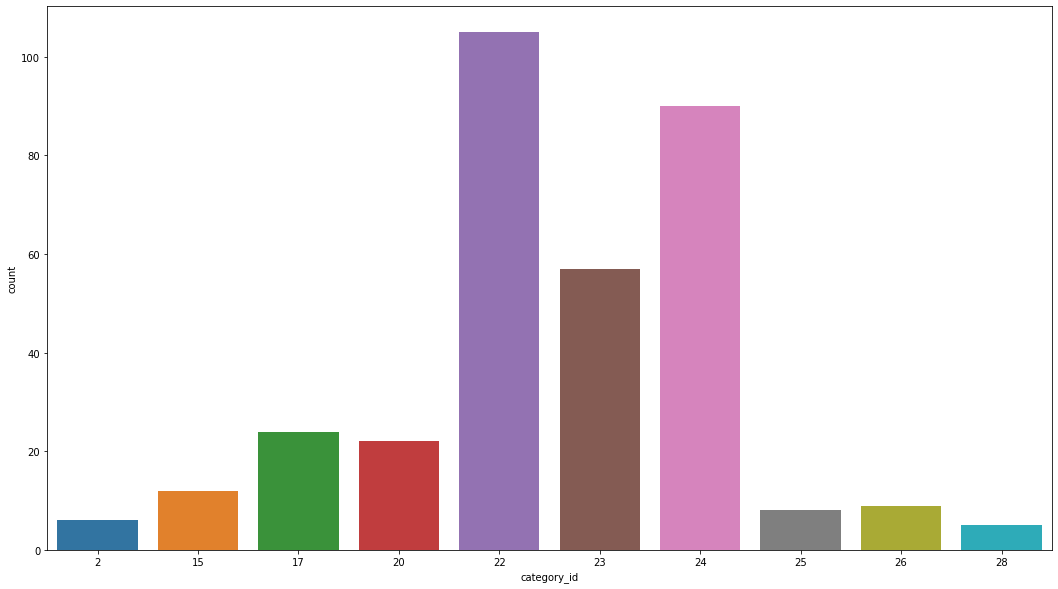

In [65]:
#그림으로 확인해보니, 22 People&Blog 개인방송이쪽에도들어가고 24entertain에도 들어가네
plt.figure(figsize=(18,10))
sns.countplot(data=my_data1, x='category_id')

In [73]:
my_data3=a.loc[((a['category_id']==22)|(a['category_id']==24))&(a['views'] >= 1000000)&(a['likes']/(a['likes']+a['dislikes'])*100 < 80)&(a['likes']>100), ['title','category_id','trending_ym']]
my_data3

,title,category_id,trending_ym
0,안녕하세요 보겸입니다,24,20-08
2,평생 반성하면서 살겠습니다.,22,20-08
30,진심,22,20-08
38,드릴말씀있습니다.,22,20-08
65,죄송합니다,22,20-08
...,...,...,...
76986,[ENG] [SMTM10] PRODUCER CYPHER I 10월 1일 (금) 밤 ...,24,21-09
79863,먼저 먹는 놈이 임자군. #shorts,22,21-09
80085,먼저 먹는 놈이 임자군. #shorts,22,21-09
80305,먼저 먹는 놈이 임자군. #shorts,22,21-09


In [74]:
#직접 title 뽑아서 확인해보니, 논란많았던 머니게임, 사과영상, 선넘은 prank video, 광고논란 등등..
#막상 뉴스쪽은 좋아요 비율 높음. 같은 뉴스지만 코로나 관련 단어가 들어간 컬럼만들어서 True, False 로 이원화해서 비교분석 해야할듯
my_data3.to_csv('csv_file/wanttoknow1.csv', sep=',', index=False, encoding='utf-8-sig')

In [78]:
#특정 문자 포함된 데이터 뽑기 , str함수 필터링  // BTS 트렌딩 영상만 1000개
my_filter2 = a['title'].str.startswith('BTS')
my_data4 = a[my_filter2]
my_data4

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
965,2020-08-19,BTS (방탄소년단) 'Dynamite' Official Teaser,Big Hit Labels,10,2020-08-18T15:00:02Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,31964452,3859138,71845,828953,20-08
1104,2020-08-20,BTS (방탄소년단) 'Dynamite' Official Teaser,Big Hit Labels,10,2020-08-18T15:00:02Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,46141113,5593830,120528,957490,20-08
1235,2020-08-21,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,10,2020-08-21T03:58:10Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7046843,165473,2314262,20-08
1239,2020-08-21,BTS (방탄소년단) 'Dynamite' Official Teaser,Big Hit Labels,10,2020-08-18T15:00:02Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,56453626,6034304,144815,1006217,20-08
1247,2020-08-21,BTS (방탄소년단) 'Dynamite' Official MV REACTION/RE...,RT TV,1,2020-08-21T06:18:08Z,[None],186253,16880,492,738,20-08
...,...,...,...,...,...,...,...,...,...,...,...
85032,2021-10-20,BTS (방탄소년단) PERMISSION TO DANCE ON STAGE Offic...,HYBE LABELS,10,2021-10-15T09:30:04Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,5151675,1279569,2719,35694,21-10
85265,2021-10-21,BTS (방탄소년단) PERMISSION TO DANCE ON STAGE Offic...,HYBE LABELS,10,2021-10-15T09:30:04Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,5258187,1299069,2747,35151,21-10
85498,2021-10-22,BTS (방탄소년단) PERMISSION TO DANCE ON STAGE Offic...,HYBE LABELS,10,2021-10-15T09:30:04Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,5363285,1318733,2776,34833,21-10
85716,2021-10-23,BTS (방탄소년단) PERMISSION TO DANCE ON STAGE Offic...,HYBE LABELS,10,2021-10-15T09:30:04Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,5438187,1331973,2793,34486,21-10


<AxesSubplot:xlabel='trending_ym', ylabel='count'>

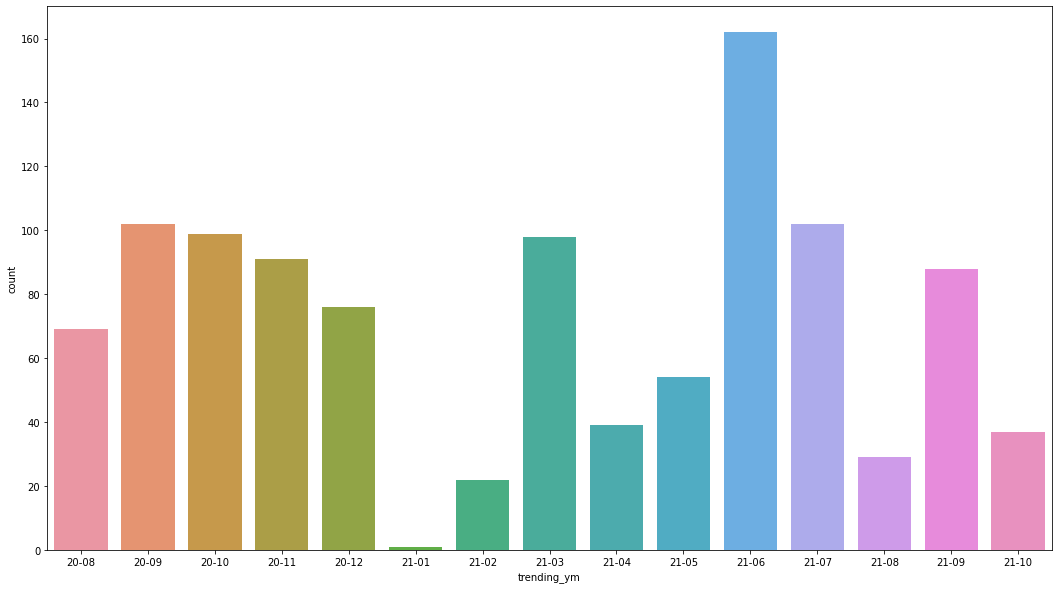

In [80]:
#21년 3월 , 6월 영상수 많은데 신곡발표있나 확인 해보니 3월은 who, 6월은 Butter 신곡
plt.figure(figsize=(18,10))
sns.countplot(data=my_data4, x='trending_ym')

In [84]:
#문자열 포함된것 contains 메서드, 여러개 태그 & 여러개 문자열 사용법은 알아봐야 할듯
corona_related_word =['코로나', '백신', '두기', '코비드', 'corona', 'covid', '확진자', '사망자', '위드']
my_filter3 = a['title'].str.contains('코로나')
a[my_filter3]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
463,2020-08-15,코로나 감염 확산 속 광복절 집회 '강행'…도심 곳곳서 인파 몰려,뉴스TVCHOSUN,25,2020-08-15T05:18:30Z,TV조선|티비조선|조선일보|종편|종합편성|TV조선뉴스|뉴스|뉴스프로그램|NEWS|채...,184005,6328,360,1425,20-08
635,2020-08-16,코로나 감염 확산 속 광복절 집회 '강행'…도심 곳곳서 인파 몰려,뉴스TVCHOSUN,25,2020-08-15T05:18:30Z,TV조선|티비조선|조선일보|종편|종합편성|TV조선뉴스|뉴스|뉴스프로그램|NEWS|채...,210644,6881,379,1637,20-08
696,2020-08-17,2020년 8월 17일(월) 10시 정규재의 텐텐뉴스 - 코로나 사망자가 없다?!,펜앤드마이크TV,25,2020-08-17T02:07:19Z,정규재|펜앤마이크|정규재tv|정규재방송|펜앤드마이크|뉴스|오전뉴스|조간|10시|아침...,95743,8683,691,447,20-08
702,2020-08-17,8/17(월) - 통합당 변신? 전광훈 이름도 못꺼내면서(이낙연) / 양성판정 어머...,CBS 김현정의 뉴스쇼,25,2020-08-17T00:00:30Z,김현정|뉴스쇼|이낙연 의원|전광훈 목사|사랑제일교회|코로나 3단계|김원웅 발언|김용...,63477,1484,136,106,20-08
807,2020-08-17,코로나 감염 확산 속 광복절 집회 '강행'…도심 곳곳서 인파 몰려,뉴스TVCHOSUN,25,2020-08-15T05:18:30Z,TV조선|티비조선|조선일보|종편|종합편성|TV조선뉴스|뉴스|뉴스프로그램|NEWS|채...,245977,7642,444,1887,20-08
...,...,...,...,...,...,...,...,...,...,...,...
71487,2021-08-13,"인도, 코로나 대유행 비극 후 '집단면역' [글로벌 리포트] / YTN korean",YTN korean,25,2021-08-07T10:52:43Z,YTN|ytn korean|ytn world|글로벌 리포트|인도|집단면역|코로나19...,757157,4312,230,2016,21-08
71687,2021-08-14,일상Vlog | 코로나 백신처럼 언젠간 루게릭 치료제도🙏,삐루빼로,22,2021-08-08T11:03:13Z,루게릭병|일상브이로그|브이로그,483025,12059,132,886,21-08
71705,2021-08-14,"인도, 코로나 대유행 비극 후 '집단면역' [글로벌 리포트] / YTN korean",YTN korean,25,2021-08-07T10:52:43Z,YTN|ytn korean|ytn world|글로벌 리포트|인도|집단면역|코로나19...,761455,4344,230,2033,21-08
71920,2021-08-15,일상Vlog | 코로나 백신처럼 언젠간 루게릭 치료제도🙏,삐루빼로,22,2021-08-08T11:03:13Z,루게릭병|일상브이로그|브이로그,491326,12189,134,890,21-08


In [87]:
#isin 메서드// 이건 정확히 딱 그 단어가 있어야 정확히 있어야 검출됨. / 소문자 lower() 메서드 사용가능
corona_related_word =['코로나', '백신', '두기', '코비드', 'corona', 'covid', '확진자', '사망자', '위드']
my_filter4=a['tags'].str.lower().isin(corona_related_word)
a[my_filter4]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym


In [106]:
#contains 메서드의 경우 NaN 데이터 만나면 오류발생하여 처리해줘야 함, 옵션 na=True 일 경우, NaN을 만나면 True 반환, False도 마찬가지
my_filter5 = a['tags'].str.contains('코로나', na=True)
a[my_filter5]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
21,2020-08-12,8/12(수) - 집으로 투기? 이제 불가능합니다(이호승 경제수석) / 한상혁과 이...,CBS 김현정의 뉴스쇼,25,2020-08-11T23:59:13Z,김현정|뉴스쇼|이호승 경제수석|4대강 사업|코로나 추경|한상혁 방통위원장|한동훈 검...,57691,1081,83,44,20-08
44,2020-08-12,[#족집게_낭닥] 🚫지금부터 응급실 폐쇄합니다🚫ㅣ낭만닥터 김사부 (Dr. Roman...,SBS Drama,24,2020-08-11T06:13:59Z,서현진|낭만닥터김사부|낭만닥터김사부2|서현진낭닥|한석규|한석규낭닥|유연석|유연석낭닥...,348098,5771,65,820,20-08
66,2020-08-12,"[8/10] 장영승,최배근,임재만,박시영,이택수,정형준,양지열,신장식,장용진,류밀희...",TBS 시민의방송,25,2020-08-10T01:28:12Z,TBS|김어준|뉴스공장|코로나|정의연|미국|트럼프|마포쉼터|이재용|정경심|사모펀드|...,405964,26132,465,337,20-08
140,2020-08-13,"[8/13] 조해진,정청래,김영록,이택수,이희수,가브리엘 루이스,럭키,크리스 존슨,...",TBS 시민의방송,25,2020-08-13T01:46:44Z,TBS|김어준|뉴스공장|김어준의뉴스공장|더불어민주당|원내대표|민주당|미래통합당|국회...,315555,22889,488,453,20-08
188,2020-08-13,[#족집게_낭닥] 🚫지금부터 응급실 폐쇄합니다🚫ㅣ낭만닥터 김사부 (Dr. Roman...,SBS Drama,24,2020-08-11T06:13:59Z,서현진|낭만닥터김사부|낭만닥터김사부2|서현진낭닥|한석규|한석규낭닥|유연석|유연석낭닥...,451460,6818,88,1004,20-08
...,...,...,...,...,...,...,...,...,...,...,...
88371,2021-11-06,MBN 뉴스파이터-결혼식에 3만 원 내고 간 친구…그 뒷 이야기,MBN News,25,2021-11-03T11:06:06Z,mbn|mbn news|mbn 뉴스|mbn 뉴스파이터|뉴스파이터|김명준 앵커|김명준...,615977,10272,380,1365,21-11
88467,2021-11-06,[나 혼자 산다 예고] ＜잘 봐! 허니제이 일상이다 & 화사의 덤벼라 백신아!＞ 4...,MBCentertainment,24,2021-10-29T16:00:33Z,나혼자산다|420회|예고|허니제이|화사|나혼산|홀리뱅|스트릿우먼파이터|스우파|댄서|...,2219305,31130,382,1557,21-11
88531,2021-11-06,"프랑스를 휩쓰는 극우 포퓰리즘, 차기 대권 차지하나? (KBS_236회_2021.1...",세계는지금,25,2021-10-30T13:37:03Z,특파원보고 세계는 지금|세계는 지금|국제시사|수단|군부쿠데타|부르한장군|브라질경제난...,224062,4087,259,572,21-11
88593,2021-11-07,MBN 뉴스파이터-결혼식에 3만 원 내고 간 친구…그 뒷 이야기,MBN News,25,2021-11-03T11:06:06Z,mbn|mbn news|mbn 뉴스|mbn 뉴스파이터|뉴스파이터|김명준 앵커|김명준...,711726,11358,445,1492,21-11


In [96]:
#contains 에 리스트 형태 사용하는 trick // 단순 코로나만했을 때는 256개, join활용했을 떄405개
corona_related_word =['코로나', '백신', '두기', '코비드', 'corona', 'covid', '확진자', '사망자', '위드','확진', '마스크']
my_filter6 = (a['title'].str.contains('|'.join(corona_related_word), na=False))
my_data5=a[my_filter6]
my_data5

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
20,2020-08-12,[주식왕용느]러시아??푸틴??백신??★어린이노약자뿐아니라누구든따라하지마세요!,TV용느님,20,2020-08-12T07:30:55Z,용느|만만|똘끼|박호두|주식|단타,106504,1181,73,91,20-08
168,2020-08-13,숙명여고 쌍둥이 1심|한상혁 권경애 직접 통화해보니..|러시아 백신,CBS 김현정의 뉴스쇼,25,2020-08-13T01:29:15Z,김현정|뉴스쇼|댓꿀쇼|숙명여고|러시아 백신|숙명여고 쌍둥이|푸틴 백신|한상혁 방통위...,51367,1636,65,118,20-08
207,2020-08-13,[주식왕용느]러시아??푸틴??백신??★어린이노약자뿐아니라누구든따라하지마세요!,TV용느님,20,2020-08-12T07:30:55Z,용느|만만|똘끼|박호두|주식|단타,114962,1204,83,110,20-08
463,2020-08-15,코로나 감염 확산 속 광복절 집회 '강행'…도심 곳곳서 인파 몰려,뉴스TVCHOSUN,25,2020-08-15T05:18:30Z,TV조선|티비조선|조선일보|종편|종합편성|TV조선뉴스|뉴스|뉴스프로그램|NEWS|채...,184005,6328,360,1425,20-08
635,2020-08-16,코로나 감염 확산 속 광복절 집회 '강행'…도심 곳곳서 인파 몰려,뉴스TVCHOSUN,25,2020-08-15T05:18:30Z,TV조선|티비조선|조선일보|종편|종합편성|TV조선뉴스|뉴스|뉴스프로그램|NEWS|채...,210644,6881,379,1637,20-08
...,...,...,...,...,...,...,...,...,...,...,...
88357,2021-11-06,"[꼬꼬무 3회 요약] 사망자만 292명, 서해훼리호는 왜 침몰했을까? | 꼬리에 꼬...",달리 [SBS 교양 공식채널],24,2021-11-05T09:53:23Z,꼬리에꼬리를무는그날이야기|꼬꼬무|꼬꼬무정규편성|꼬꼬무첫방송|꼬꼬무다시보기|꼬꼬무장현...,459793,7757,172,744,21-11
88467,2021-11-06,[나 혼자 산다 예고] ＜잘 봐! 허니제이 일상이다 & 화사의 덤벼라 백신아!＞ 4...,MBCentertainment,24,2021-10-29T16:00:33Z,나혼자산다|420회|예고|허니제이|화사|나혼산|홀리뱅|스트릿우먼파이터|스우파|댄서|...,2219305,31130,382,1557,21-11
88542,2021-11-06,"[Eng]차🚘 타고 부산 여행~ 최애 돼지국밥/밀면, 휴게소 유아휴게실, 하얏트, ...",yoovlog,22,2021-10-27T05:58:25Z,유트루|vlog|한국일상|유투버|Collab|Korean|먹방|가족|뷰티유튜버일상|...,557200,10276,135,932,21-11
88563,2021-11-07,"[꼬꼬무 3회 요약] 사망자만 292명, 서해훼리호는 왜 침몰했을까? | 꼬리에 꼬...",달리 [SBS 교양 공식채널],24,2021-11-05T09:53:23Z,꼬리에꼬리를무는그날이야기|꼬꼬무|꼬꼬무정규편성|꼬꼬무첫방송|꼬꼬무다시보기|꼬꼬무장현...,629757,9764,237,1039,21-11


<AxesSubplot:xlabel='category_id', ylabel='count'>

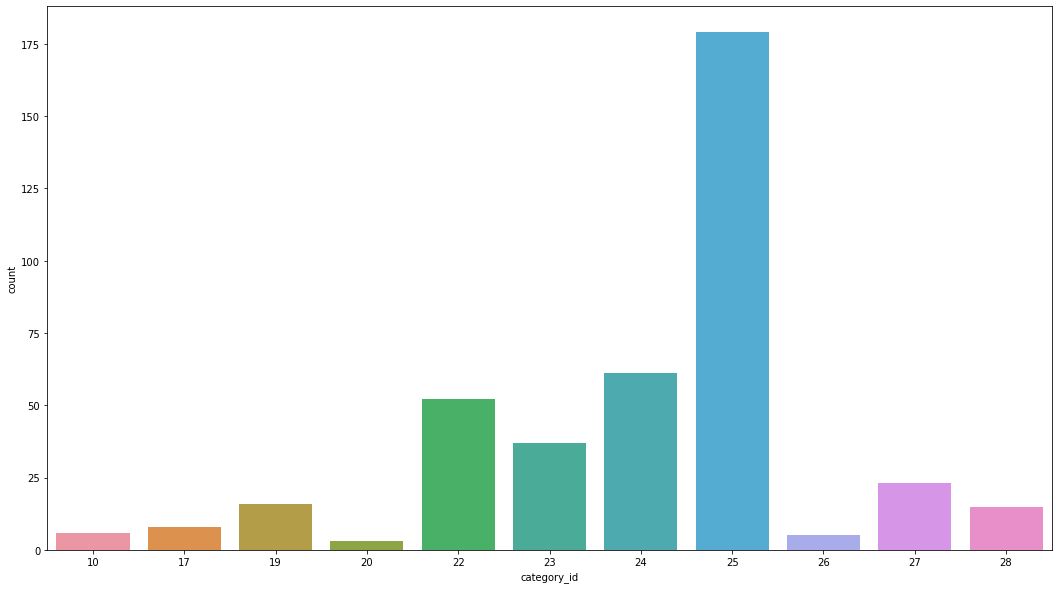

In [94]:
#코로나 백신 관련해서는 확실히 뉴스 카테고리가 높음. 근데 88000데이터중에 총 title만으로 400개.. 0.45%
plt.figure(figsize=(18,10))
sns.countplot(data=my_data5, x='category_id')

In [6]:
#제목에 태그까지 contains로 검사하니 400개->1800개로 data는 늘었음.  2%가 코로나랑 관련. 근데 이상한 영상들도 여전히있음
#contains 함수도 소문자 , 대문자 구분하니까 애초에 title, tag를 소문자 변환해줘야함 
#제약회사 하면 치료제, 백신은 무조건 연결됨. 필요성 낮은것 중복 최대한 피해서 넣기. 제약회사가 정말 다른 약개발일 수도 있기 때문
#또한 지금 이정도 돌리는데도 0.7초 정도 걸림. 관련 단어 제한해야함
corona_related_word =['코로나', '바이러스','변이', '백신', '거리두기', '코비드', 'corona', 
                    'covid', '확진자', '사망자', '위드', '확진','마스크','전파자','방역', '자가격리', '비대면']

corona_not_related_word =['drama', '뮤직비디오']

expr01 = a['title'].str.lower().str.contains('|'.join(corona_related_word), na=False)
expr02 = a['tags'].str.lower().str.contains('|'.join(corona_related_word), na=False)
expr03 = a['title'].str.lower().str.contains('|'.join(corona_not_related_word), na=False)
expr04 = a['tags'].str.lower().str.contains('|'.join(corona_not_related_word), na=False)

my_filter7 = ((expr01)|(expr02))&~((expr03)|(expr04))
my_data6=a[my_filter7]
my_data6

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym,corona_related
20,2020-08-12,[주식왕용느]러시아??푸틴??백신??★어린이노약자뿐아니라누구든따라하지마세요!,TV용느님,20,2020-08-12T07:30:55Z,용느|만만|똘끼|박호두|주식|단타,106504,1181,73,91,20-08,False
21,2020-08-12,8/12(수) - 집으로 투기? 이제 불가능합니다(이호승 경제수석) / 한상혁과 이...,CBS 김현정의 뉴스쇼,25,2020-08-11T23:59:13Z,김현정|뉴스쇼|이호승 경제수석|4대강 사업|코로나 추경|한상혁 방통위원장|한동훈 검...,57691,1081,83,44,20-08,False
66,2020-08-12,"[8/10] 장영승,최배근,임재만,박시영,이택수,정형준,양지열,신장식,장용진,류밀희...",TBS 시민의방송,25,2020-08-10T01:28:12Z,TBS|김어준|뉴스공장|코로나|정의연|미국|트럼프|마포쉼터|이재용|정경심|사모펀드|...,405964,26132,465,337,20-08,False
140,2020-08-13,"[8/13] 조해진,정청래,김영록,이택수,이희수,가브리엘 루이스,럭키,크리스 존슨,...",TBS 시민의방송,25,2020-08-13T01:46:44Z,TBS|김어준|뉴스공장|김어준의뉴스공장|더불어민주당|원내대표|민주당|미래통합당|국회...,315555,22889,488,453,20-08,False
168,2020-08-13,숙명여고 쌍둥이 1심|한상혁 권경애 직접 통화해보니..|러시아 백신,CBS 김현정의 뉴스쇼,25,2020-08-13T01:29:15Z,김현정|뉴스쇼|댓꿀쇼|숙명여고|러시아 백신|숙명여고 쌍둥이|푸틴 백신|한상혁 방통위...,51367,1636,65,118,20-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...
88542,2021-11-06,"[Eng]차🚘 타고 부산 여행~ 최애 돼지국밥/밀면, 휴게소 유아휴게실, 하얏트, ...",yoovlog,22,2021-10-27T05:58:25Z,유트루|vlog|한국일상|유투버|Collab|Korean|먹방|가족|뷰티유튜버일상|...,557200,10276,135,932,21-11,False
88562,2021-11-07,[나혼자산다 선공개] 홀리뱅의 리더! 22년 차 프로 댄서 허니제이🐝 소녀 감성 가...,나혼자산다 STUDIO,22,2021-11-05T08:47:35Z,나혼자산다|나혼산|선공개|화사|먹방|요리|백신|MBC|예능|금요예능|독신|1인가족|...,863161,14316,210,728,21-11,False
88593,2021-11-07,MBN 뉴스파이터-결혼식에 3만 원 내고 간 친구…그 뒷 이야기,MBN News,25,2021-11-03T11:06:06Z,mbn|mbn news|mbn 뉴스|mbn 뉴스파이터|뉴스파이터|김명준 앵커|김명준...,711726,11358,445,1492,21-11,False
88674,2021-11-07,레몬데몬의 최후 / 감염 모드 /프나펑 스토리 #47 【FNF Story】 프라이데...,시엘,20,2021-10-31T03:00:12Z,friday night funkin'|프나펌|fnf|시엘|프라이데이 나이트 펌킨|프...,456722,5073,255,1576,21-11,False


<AxesSubplot:xlabel='category_id', ylabel='count'>

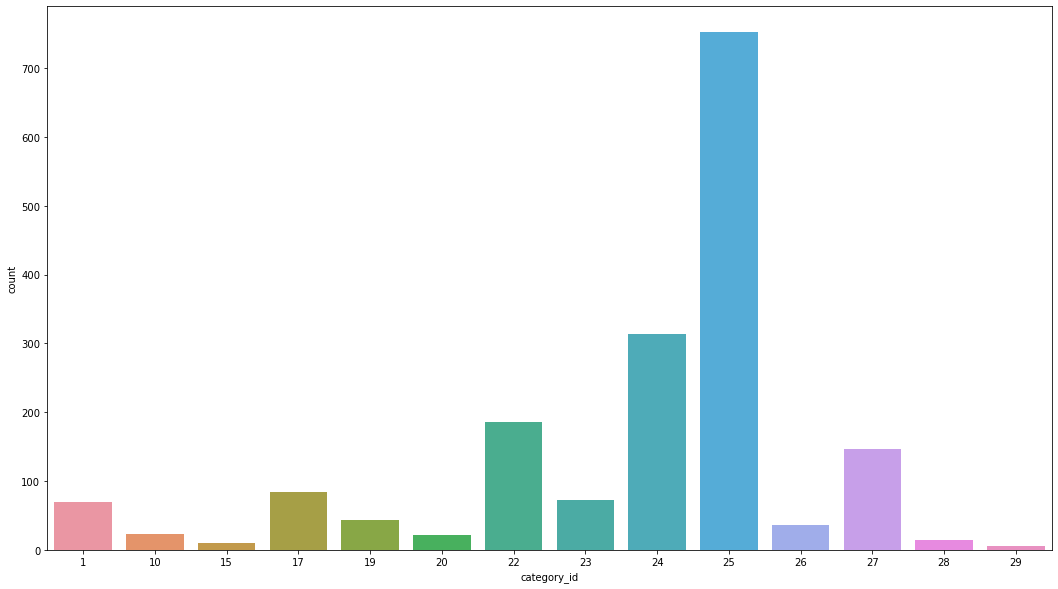

In [122]:
#확실히 뉴스쪽이  코로나 관련 영상수 많긴하다. 
#알기로 코로나 관련되면 수익창출없어지고 경고들어오는 등
#유튜버들도 최대한 코로나 삐-소리 처리하면서 최대한 언급안하려고 했는데 이영향도 있지 않을까
#코로나 관련없는단어 제거하는 기능 구현 후 24번 카테고리 더 줄어듦. 24번이 의미없이 태그에 코로나 관련단어 많이 넣어둠
plt.figure(figsize=(18,10))
sns.countplot(data=my_data6, x='category_id')

In [100]:
my_data6.to_csv('csv_file/covid_related_tagsNtitle_data.csv',  sep=',', index=False, encoding='utf-8-sig')
#직접 데이터 다운받아서 보니, 27번은 대부분 주식관련, 24번 entertain에 낭만닥터김사부 드라마-태크에 코로나,메르스 있음..
#전혀 관계없는데 코로나 태그 갖다쓴 영상 종종 보임, 근데 관련없는건 전부 없애자니 사실 따지면 뉴스,정치,개인vlog 외에 다 없어짐
#그럼 이 데이터가 의미가 있는가..? 애초에 카테고리는 정해져있는건 아닌지. 데이터 88000개중 많이 긁어야 1800개가 안되는데

In [8]:
a['corona_related'] = False
a.loc[my_filter7, 'corona_related'] = True
a

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym,corona_related
0,2020-08-12,안녕하세요 보겸입니다,보겸 BK,24,2020-08-09T09:32:48Z,보겸|bokyem,5947503,53326,105756,139946,20-08,False
1,2020-08-12,부락토스의 계획 [총몇명 프리퀄],총몇명,1,2020-08-12T09:00:08Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,20-08,False
2,2020-08-12,평생 반성하면서 살겠습니다.,양팡 YangPang,22,2020-08-10T09:54:13Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,20-08,False
3,2020-08-12,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,24,2020-08-11T15:00:58Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,20-08,False
4,2020-08-12,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,10,2020-08-11T09:00:13Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,20-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...
88749,2021-11-07,KT에 한달에 50만원 쓰는 사람의 최후,UPSub없섭,28,2021-10-25T05:15:00Z,잇섭|없섭|itsub|upsub|잇섭 kt|없섭 kt|kt 인터넷|kt 디도스|kt...,2990589,43297,1473,3642,21-11,False
88750,2021-11-07,[김장장TV 이십세기들 ep.66] 돈 많이 번 장항준!왜 아직도 윤종신한텐 얻어먹을까?,김장장TV이십세기들,24,2021-10-27T03:00:30Z,[None],190984,4498,73,228,21-11,False
88751,2021-11-07,*실제상황* 지진이 왔을때 일본인아내의 반응 #shorts,제주커플jeju-couple,22,2021-10-29T02:37:03Z,짧은동영상|국제커플|커플vlog|커플몰카|반응보기|한일커플|커플|カップル|モニタリン...,1284149,15973,640,713,21-11,False
88752,2021-11-07,누리호가 찍은 지구! 누리호 동체 탑재카메라 촬영영상,한국항공우주연구원 KARI TV,28,2021-10-27T01:09:15Z,KARI|Korea Aerospace Research Institute|한국항공우주...,679769,16389,293,2250,21-11,False


<AxesSubplot:xlabel='category_id', ylabel='count'>

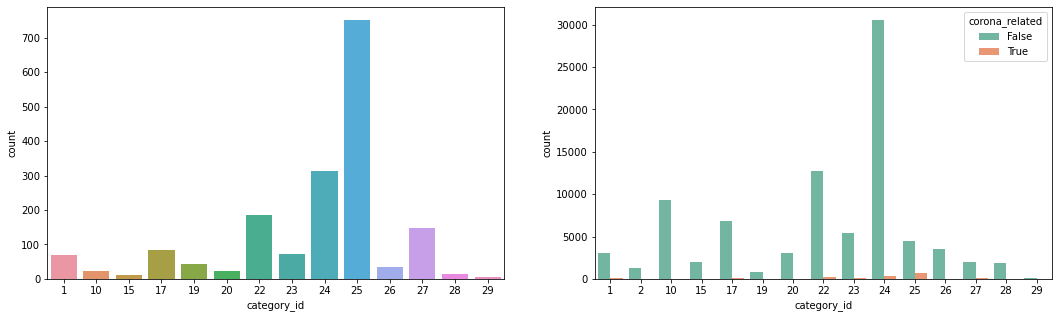

In [21]:
#1번 그래프 : 코로나 관련 영상수. 25번카테고리 뉴스 비율이 높다.
#2번 그래프 : 코로나 연관된 데이터와 아닌 것, 카테고리별 영상 수 대조해서 보여주기
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(data=my_data6, x='category_id')
plt.subplot(122)
sns.countplot(data=a, x='category_id', hue='corona_related', palette='Set2')


<AxesSubplot:xlabel='category_id', ylabel='count'>

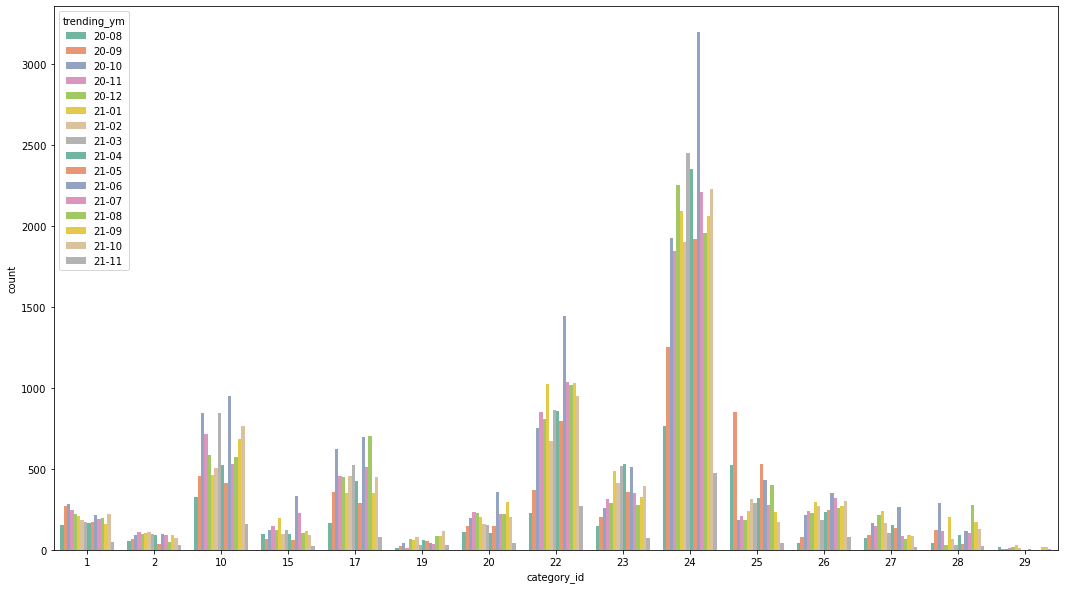

In [18]:
#trending 기간으로 영상 분류했을 때
plt.figure(figsize=(18,10))
sns.countplot(data=a, x='category_id', hue='trending_ym', palette='Set2')